---
---

# **1 - Splitting Data**

**DATA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/7_Cross_Validation_and_Grid_Search/Advertising.csv')

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


---


## **A. Train | Test Split** 

Procedure:
0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Test for both X and y
2. Fit and Scale on X Train Data
3. Scale X Test Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
7. Adjust Parameters as Necessary and repeat steps 5 and 6

In [ ]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to training data (fit is to calculate statistical information)
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [ ]:
scaled_X_train[0:5]

array([[ 0.49300171, -0.33994238,  1.61586707],
       [ 1.61337153,  1.32852213,  1.90079242],
       [-0.84811893, -1.58789957, -1.02319564],
       [ 0.36719748,  1.54555816,  1.28890355],
       [ 0.83955678, -1.2962574 ,  0.87319278]])

In [ ]:
scaled_X_test[0:5]

array([[-0.91339472,  1.76259419,  0.68168558],
       [ 1.23121149,  0.23655959, -1.19601922],
       [-0.46002473, -0.40776614,  0.35005115],
       [-0.49681653,  1.65407618,  0.9479273 ],
       [-1.42610633,  0.08056494, -1.35015916]])

---

### **a. Create and Fit Model**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)

In [ ]:
model.fit(scaled_X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = model.predict(scaled_X_test)

---

### **b. Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred)

7.341775789034128

---

### **c. Adjust Parameters and Re-fit the Model**

In [ ]:
model = Ridge(alpha=1)

In [ ]:
model.fit(scaled_X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = model.predict(scaled_X_test)

---

### **d. Another Evaluation**

In [ ]:
mean_squared_error(y_test, y_pred)

2.3190215794287514

Much better! We could repeat this until satisfied with performance metrics. (We previously showed RidgeCV can do this for us, but the purpose of this lecture is to generalize the CV process for any model).

Train | Test split method has a disadvantage of not having a portion of data that can report performance metric on truly unseen data.

While adjusting hyperparameters on test data is a fair technique and not typically referred to as data leakage, it is a potential issue in regards to reporting.

If we want a truly fair and final set of performance metrics, we should get these metrics from a final test set that we do not allow ourselves to adjust on.

---


## **B. Train | Validation | Test Split**


This is often also called a `"hold-out"` set, since you `should not adjust` parameters based on the `final test` set, but instead `use` it *only* for `reporting` final expected performance.

Procedure:
0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Sacler on X Train Data
3. Scale X Eval Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_eval)
7. Adjust Parameters as Necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

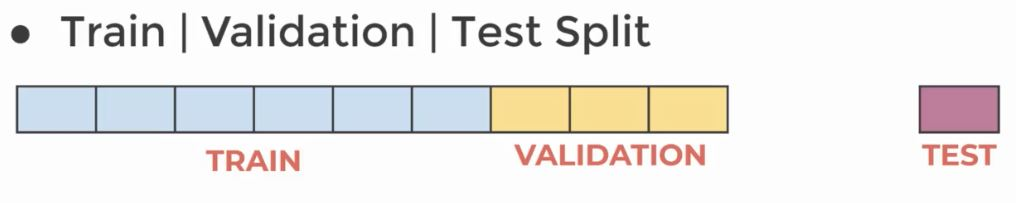

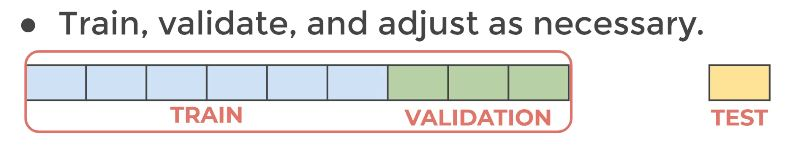

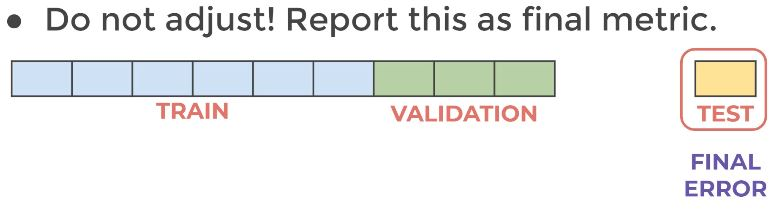

Recall the entire reason to not adjust after the final test data set is to get the fairest evaluation of the model.

The model was not fitted to the final test data and the model hyperparameters were not adjusted based off final test data. This is truly never before seen data

In [ ]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

In [ ]:
######################################################################
#### SPLIT TWICE! Here we create TRAIN | VALIDATION | TEST  #########
####################################################################
from sklearn.model_selection import train_test_split

# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size (eval is for validation and test is for final metrics)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [ ]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

scaled_X_eval = scaler.transform(X_eval)
scaled_X_test = scaler.transform(X_test)

---

### **a. Create and Fit Model**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)

In [ ]:
model.fit(scaled_X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_eval_pred = model.predict(scaled_X_eval)

---

### **b. Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_eval, y_eval_pred)

7.320101458823871

---

### **c. Adjust Parameters and Re-fit the Model**

In [ ]:
model = Ridge(alpha=1)

In [ ]:
model.fit(scaled_X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_eval_pred = model.predict(scaled_X_eval)

---

### **d. Another Evaluation**

In [ ]:
mean_squared_error(y_eval, y_eval_pred)

2.383783075056986

---

### **e. Final Evaluation (Can no longer edit parameters after this!)**

In [ ]:
y_final_test_pred = model.predict(scaled_X_test)

In [ ]:
mean_squared_error(y_test, y_final_test_pred)

2.2542600838005176

---
---

# **2 - Cross Validation**



Cross validation is a more advanced set of methods for splitting data into training and testing sets.

Is there a way we can achieve the following?
* Train on all the data
* Evaluate on all data

While it sounds impossible, we can achieve this with cross validation.

A nice official documentation guide can be found here: https://scikit-learn.org/stable/modules/cross_validation.html

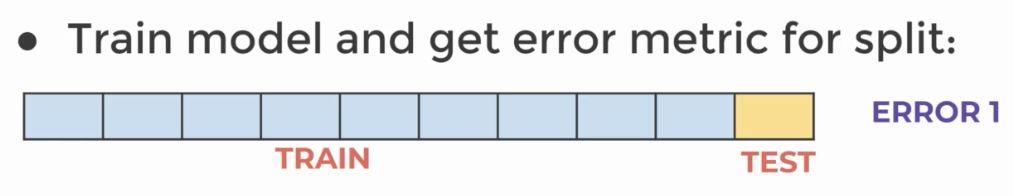

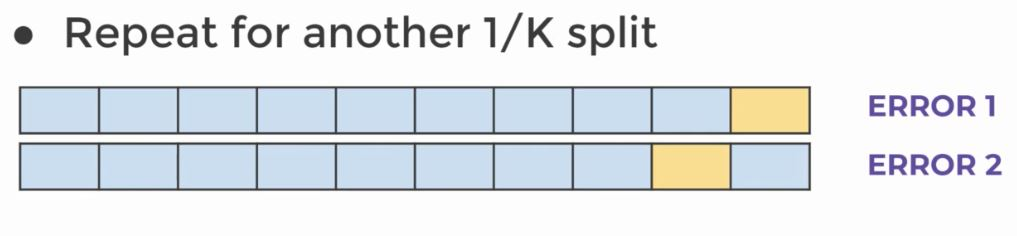

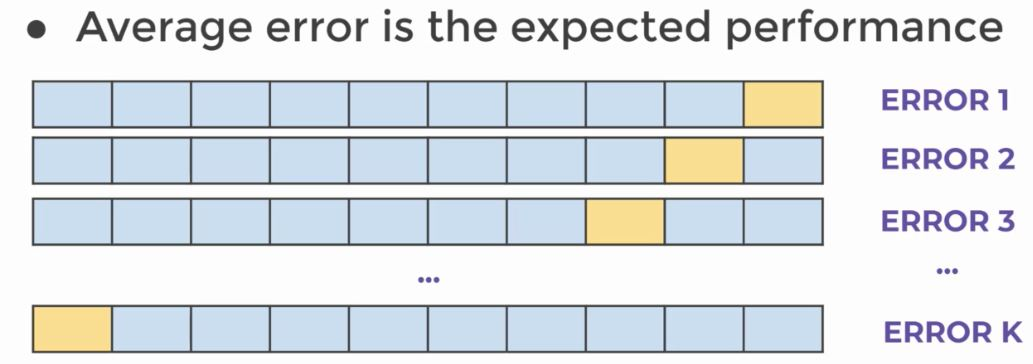

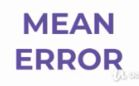

This is known as K-fold cross-validation

Common choice for K is 10 so each test set is 10% of your total data

Largest K possible would be K equal to the number of number of rows
* This is known as `leave one out` cross validation
* Computationally expensive

---

## **A. Cross Validation with cross_val_score**


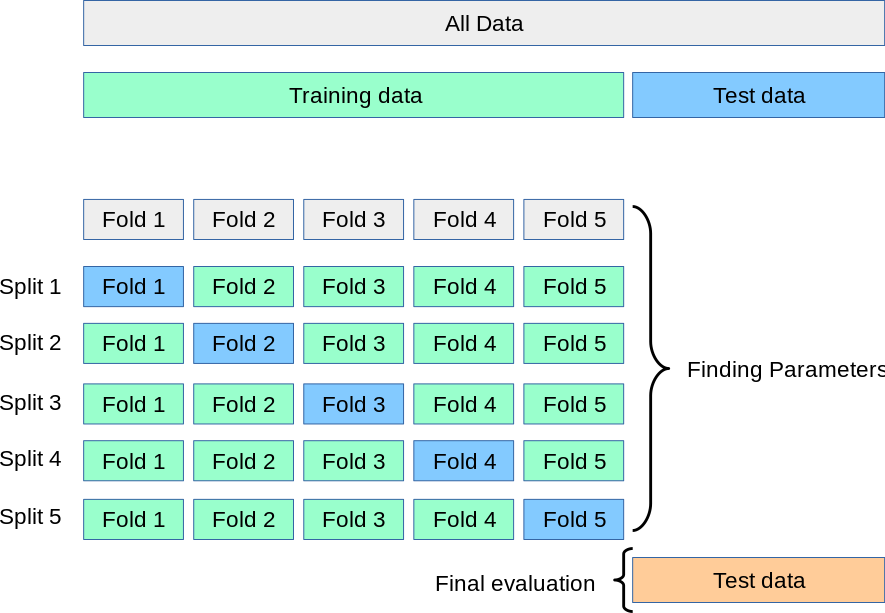

In [ ]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

scaled_X_test = scaler.transform(X_test)

---

### **a. Create Model**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=100)
# We will Fit the Data later

---

### **b. Cross_Val_Score Evaluation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
# Negative RMSE so all metrics follow convention "Higher is better"
scores = cross_val_score(model, scaled_X_train, y_train,
                         scoring='neg_mean_squared_error', cv=5)

In [ ]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [ ]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

8.215396464543606

---

### **c. Adjust model based on metrics**

In [ ]:
model = Ridge(alpha=1)

---

### **d. Another Cross_Val_Score Evaluation**

In [ ]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
# Negative RMSE so all metrics follow convention "Higher is better"
scores = cross_val_score(model, scaled_X_train, y_train,
                         scoring='neg_mean_squared_error', cv=5)

In [ ]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

3.344839296530695

---

### **e. Final Evaluation (Can no longer edit parameters after this!)**

In [ ]:
# Need to fit the model first!
model.fit(scaled_X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_final_test_pred = model.predict(scaled_X_test)

In [ ]:
mean_squared_error(y_test, y_final_test_pred)

2.3190215794287514

---

## **B. Cross Validation with cross_validate**

The cross_validate function `differs` from cross_val_score in two ways:

* It allows specifying multiple metrics for evaluation.

* It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

For single metric evaluation, where the scoring parameter is a string, callable or None, the keys will be:
        
    ['test_score', 'fit_time', 'score_time']

And for multiple metric evaluation, the return value is a dict with the following keys:

    ['test_<scorer1_name>', 'test_<scorer2_name>', 'test_<scorer...>', 'fit_time', 'score_time']

return_train_score is set to False by default to save computation time. To evaluate the scores on the training set as well you need to be set to True.

In [ ]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

### **a. Create Model**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=100)

### **b. Cross_Validate Evaluation**

In [ ]:
from sklearn.model_selection import cross_validate

SCORING OPTIONS:

https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
scores = cross_validate(model,scaled_X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

In [ ]:
scores

{'fit_time': array([0.00183916, 0.00088024, 0.00079799, 0.00073552, 0.00073695]),
 'score_time': array([0.00178647, 0.00085855, 0.00080752, 0.00150394, 0.00080919]),
 'test_max_error': array([ -6.44988486,  -5.58926073, -10.33914027,  -6.61950405,
         -7.75578515]),
 'test_neg_mean_absolute_error': array([-2.31243044, -1.74653361, -2.56211701, -2.01873159, -2.27951906]),
 'test_neg_mean_squared_error': array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
         -8.38562723])}

In [ ]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_max_error
0,0.001839,0.001786,-2.312430,-9.325530,-6.449885
1,0.000880,0.000859,-1.746534,-4.944962,-5.589261
2,0.000798,0.000808,-2.562117,-11.396652,-10.339140
3,0.000736,0.001504,-2.018732,-7.024211,-6.619504
4,0.000737,0.000809,-2.279519,-8.385627,-7.755785


In [ ]:
pd.DataFrame(scores).mean().abs()

fit_time                        0.000998
score_time                      0.001153
test_neg_mean_absolute_error    2.183866
test_neg_mean_squared_error     8.215396
test_max_error                  7.350715
dtype: float64

---

### **c. Adjust model based on metrics**

In [ ]:
model = Ridge(alpha=1)

---

### **d. Another Cross_Validate Evaluation**

In [ ]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_validate(model,scaled_X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

In [ ]:
pd.DataFrame(scores).mean().abs()

fit_time                        0.001381
score_time                      0.001458
test_neg_mean_absolute_error    1.319685
test_neg_mean_squared_error     3.344839
test_max_error                  5.161145
dtype: float64

### **e. Final Evaluation (Can no longer edit parameters after this!)**

In [ ]:
# Need to fit the model first!
model.fit(scaled_X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_final_test_pred = model.predict(scaled_X_test)

In [ ]:
mean_squared_error(y_test,y_final_test_pred)

2.3190215794287514

---
---

# **3 - Grid Search**

We can `search` through a variety of `combinations` of `hyperparameters` with a `grid search`. While many linear models are quite simple and even come with their own specialized versions that do a search for you, this method of a `grid search` will can be `applied` to *any* model from sklearn, and we will `need` to use it later on for more `complex models`, such as Support Vector Machines.

A grid search is a way of training and validating a model on every possible combination of multiple hyperparameter options.



A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme 
* a score function.

**Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/7_Cross_Validation_and_Grid_Search/Advertising.csv')

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


---

## **A. Setup**

In [ ]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

scaled_X_test = scaler.transform(X_test)

---

## **B. Create Model**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
#help(ElasticNet)

In [ ]:
base_elastic_model = ElasticNet()

In [ ]:
# Note that a good choice of list of values for l1_ratio is often to put more values close to 1
# (i.e. Lasso) and less close to 0 (i.e. Ridge)
# l1_ratio is lambda and alpha is ratio between L1 and L2
param_grid = {'alpha':[0.1,1,5,10,50,100], # 6 alpha 
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]} # 7 L1 ratio

#For more info on Elastic Net, check 5 - Linear Regression file

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=0) # verbose: to print output of the fit (backend) -> the higher, the more messages

In [ ]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [ ]:
pd.DataFrame(grid_model.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002645,0.001940,0.000785,0.000126,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,7
1,0.001029,0.000231,0.000554,0.000190,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,6
2,0.000722,0.000038,0.000371,0.000011,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,5


## **C. Using Best Model From Grid Search for Evaluation**

In [ ]:
y_pred = grid_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_pred)

2.387342642087474

----
----